In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#read data
general = pd.read_csv("general.csv")
prenatal = pd.read_csv("prenatal.csv")
sports = pd.read_csv("sports.csv")

print(general.columns)
print(prenatal.columns)
print(sports.columns)

Index(['Unnamed: 0', 'hospital', 'gender', 'age', 'height', 'weight', 'bmi',
       'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray',
       'children', 'months'],
      dtype='object')
Index(['Unnamed: 0', 'HOSPITAL', 'Sex', 'age', 'height', 'weight', 'bmi',
       'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray',
       'children', 'months'],
      dtype='object')
Index(['Unnamed: 0', 'Hospital', 'Male/female', 'age', 'height', 'weight',
       'bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray',
       'children', 'months'],
      dtype='object')


In [9]:
#change column names for consistency purposes
prenatal.rename(columns={'HOSPITAL': 'hospital'}, inplace=True)
prenatal.rename(columns={'Sex': 'gender'}, inplace=True)
sports.rename(columns={'Hospital': 'hospital'}, inplace=True)
sports.rename(columns={'Male/female': 'gender'}, inplace=True)


#merge data
hospitals_data = pd.concat([general, prenatal, sports], ignore_index=True)

#show
hospitals_data.head()

,Unnamed: 0,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,general,man,33.0,1.64,66.0,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,1,general,man,48.0,1.93,106.0,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,2,general,woman,23.0,1.54,63.0,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,3,general,man,27.0,1.94,103.0,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,4,general,woman,22.0,1.76,74.0,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN


In [11]:
#clean data
hospitals_data.drop(['Unnamed: 0'], axis=1, inplace=True)
hospitals_data.dropna(how='all', inplace=True)
hospitals_data.fillna(0, inplace=True)

hospitals_data['gender'] = hospitals_data['gender'].replace('0', 'f')
hospitals_data['gender'] = hospitals_data['gender'].replace(['female', 'woman'], 'f')
hospitals_data['gender'] = hospitals_data['gender'].replace(['male', 'man'], 'm')

# Questions to the dataset

1. Which hospital has the highest number of patients? (histogram)
2. What is the most common diagnosis among the patients of sport hospital? (pie chart)
3. What share of the patients in the general hospital suffers from stomach-related issues? Round the result to the third decimal place.
4. What share of the patients in the sports hospital suffers from dislocation-related issues? Round the result to the third decimal place.
5. What is the difference in the median ages of the patients in the general and sports hospitals?

          patients number
general               461
prenatal              325
sports                214
The highest nymber of patients is in general hospital.


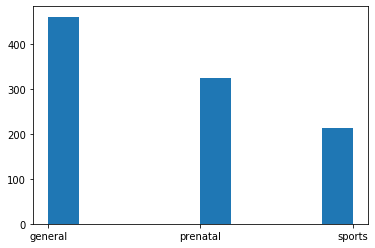

In [59]:
#answer to question 1
patients = hospitals_data['hospital'].value_counts().to_frame('patients number')
print(patients)
#checking hospital type with highest number of patients
answer1 = patients['patients number'].idxmax()
print(f'\nThe highest nymber of patients is in {answer1} hospital.')
#plotting
plt.hist(hospitals_data.hospital)
plt.show()

hospital  diagnosis  
general   cold           178
          dislocation     25
          fracture        24
          heart           56
          pregnancy        5
          sprain          23
          stomach        150
prenatal  cold            12
          pregnancy      313
sports    cold             4
          dislocation     61
          fracture        61
          sprain          81
          stomach          7
Name: diagnosis, dtype: int64
The most common diagnosis among patients of sport hospital is sprain.


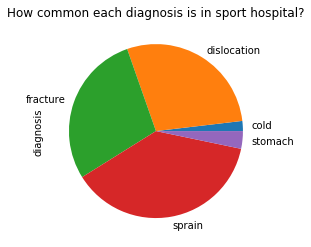

In [77]:
#answer to question 2
#check how common was each diagnosis per hospital type
diagnosis_per_hospital = hospitals_data.groupby(["hospital", "diagnosis"])['diagnosis'].count()
print(diagnosis_per_hospital)
#check the most common diagnosis in sport hospital
answer2 = diagnosis_per_hospital['sports'].idxmax()
print(f'\nThe most common diagnosis among patients of sport hospital is {answer2}.')
#plotting
diagnosis_per_hospital['sports'].plot(kind='pie')
plt.title("How common each diagnosis is in sport hospital?")
plt.show()

In [91]:
#answer to question 3
#show data in general hospital
print(diagnosis_per_hospital['general'])
#count number of all diagnosis
diagnosis_sum = diagnosis_per_hospital['general'].sum()
#check how many times stomach issues were diagnosed
stomach = diagnosis_per_hospital['general']['stomach']

answer3 = (stomach/diagnosis_sum).round(3)
print(f'\nShare of the patients in the general hospital who suffer from stomach-related issues is {answer3}.')

diagnosis
cold           178
dislocation     25
fracture        24
heart           56
pregnancy        5
sprain          23
stomach        150
Name: diagnosis, dtype: int64

Share of the patients in the general hospital who suffer from stomach-related issues is 0.325.


In [92]:
#answer to question 4
#show data in sports hospital
print(diagnosis_per_hospital['sports'])
#count number of all diagnosis
diagnosis_sum = diagnosis_per_hospital['sports'].sum()
#check how many times stomach issues were diagnosed
dislocation = diagnosis_per_hospital['sports']['dislocation']

answer4 = (dislocation/diagnosis_sum).round(3)
print(f'\nShare of the patients in the sports hospital who suffer from dislocation is {answer4}.')

diagnosis
cold            4
dislocation    61
fracture       61
sprain         81
stomach         7
Name: diagnosis, dtype: int64

Share of the patients in the sports hospital who suffer from dislocation is 0.285.


In [99]:
#answer to question 5
patients_age = hospitals_data.groupby(['hospital'])['age'].median()
age_general = patients_age['general']
age_sports = patients_age['sports']
answer5 = age_general - age_sports
print(f'Difference in the median ages of the patients in the general and sports hospitals is {answer5}.')

Difference in the median ages of the patients in the general and sports hospitals is 19.0.
